In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use("dark_background")
import sys, os

sys.path.append(os.path.abspath(os.path.join('..')))

import diffuconpy as dc


In [9]:
Diffusion = 0.009
Convection = -0.1

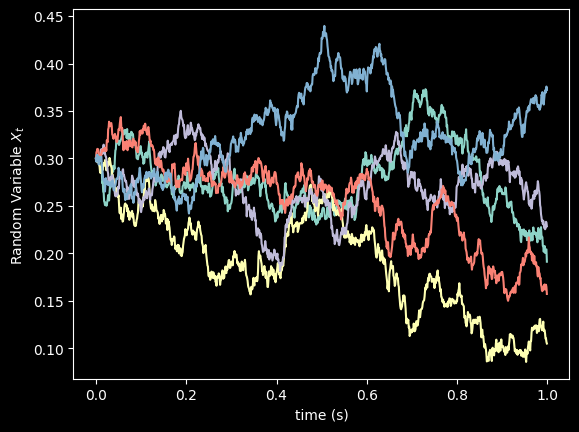

In [7]:
# Ito Process model driven by standard Wiener process

# number of simulations
nsim = 5

# Number of partitions
N = 1000
t = np.zeros(N)
X_t = np.zeros(N)
X_t[0] = 0.3
dt = (1-0)/N

mu_c = Convection
sigma_c = np.sqrt(2*Diffusion)

# Drift
def mu(X, t):
    return mu_c

# Standard Deviation
def sigma(X, t):
    return sigma_c

# Brownian motion
def dW(dt):
    return np.random.normal(loc=0.0, scale=np.sqrt(dt))

for j in range(nsim):
    for k in range(0, N-1):
        t[k+1] = t[k] + dt
        x = X_t[k]
        X_t[k+1] = x + mu(x, t)*dt + sigma(x, t)*dW(dt)
        
    plt.plot(t, X_t)

plt.xlabel("time (s)")
h = plt.ylabel("Random Variable $X_t$")
h.set_rotation(90)
plt.show()

In [17]:
# Number of space and time steps
Nt = 250
Nx = 200

# Space and time step size
dt = (1-0)/Nt
dx = (2-(-2))/Nx

# Setting up the initial condition
x = np.arange(-2, 2, dx)

# Initial Array
sigma = 0.01
amp = 1

init = amp*(1/np.sqrt(sigma*2*np.pi))*np.exp(-(1/2)*((x**2)/sigma))

In [18]:
def solve(Nt, Nx, dt, dx, Diffusion, Convection, init):
    FokkerPlank = dc.convection_diffusion_1dims(Nt, Nx, dt, dx, Diffusion, Convection, init)
    sol_Dirichlet = FokkerPlank.solve_Dirichlet(boundary=[0, 0])
    sol_Neumann = FokkerPlank.solve_Neumann(boundary_flux=[0, 0])

    return sol_Dirichlet.solution, sol_Neumann.solution

In [19]:
dirichlet, neumann = solve(Nt, Nx, dt, dx, Diffusion, Convection, init)

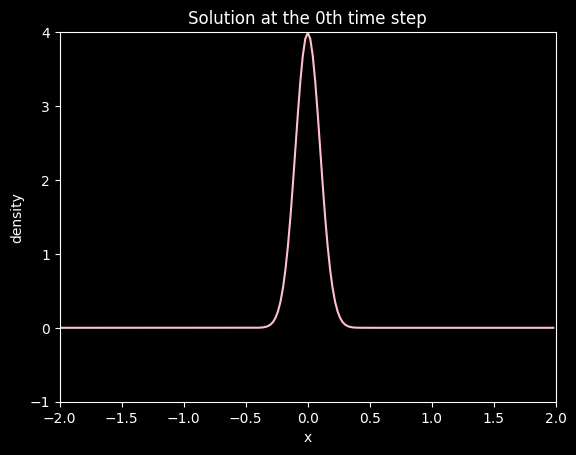

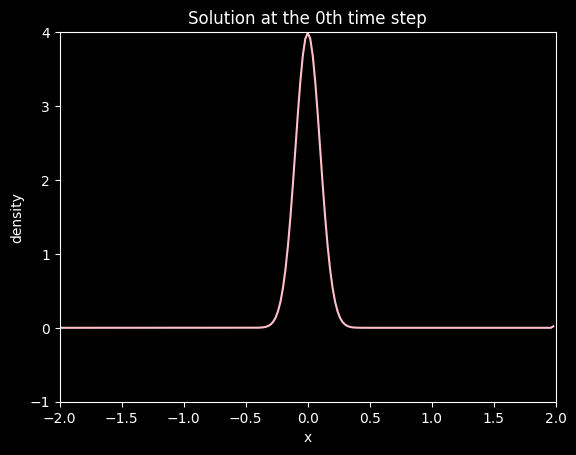

In [20]:
# Plotting the 0th time step state
plt.figure(0)
ax = plt.axes(xlim=(-2, 2), ylim=(-1, 4)) # left bound -5 and right bound 5
ax.plot(x, dirichlet[0], color='pink')
plt.title('Solution at the 0th time step')
plt.xlabel('x')
plt.ylabel('density')
plt.show()

# Plotting the 0th time step state
plt.figure(1)
ax = plt.axes(xlim=(-2, 2), ylim=(-1, 4)) # left bound -5 and right bound 5
ax.plot(x, neumann[0], color='pink')
plt.title('Solution at the 0th time step')
plt.xlabel('x')
plt.ylabel('density')
plt.show()

In [23]:
# Animates the convection model in 1 dimension
def animation_(solution, X, fps, frn, filename):
        fig = plt.figure()
        ax = plt.axes(xlim=(-2, 2), ylim=(-1, 4)) # left bound -5 and right bound 5
        line, = ax.plot(X, solution[0], color='pink')
        plt.title('diffusion of a gaussian distribution')
        plt.xlabel('x')
        plt.ylabel('PDF')

        # animation function.  This is called sequentially
        def animate(i):
            y = solution[i, :]
            global X
            line.set_ydata(y)
            return line,

        # call the animator.  blit=True means only re-draw the parts that have changed.
        anim = animation.FuncAnimation(fig, animate, frames=frn, interval=20, blit=True)
        
        plt.show()
        anim.save(filename, writer='pillow', fps=fps)

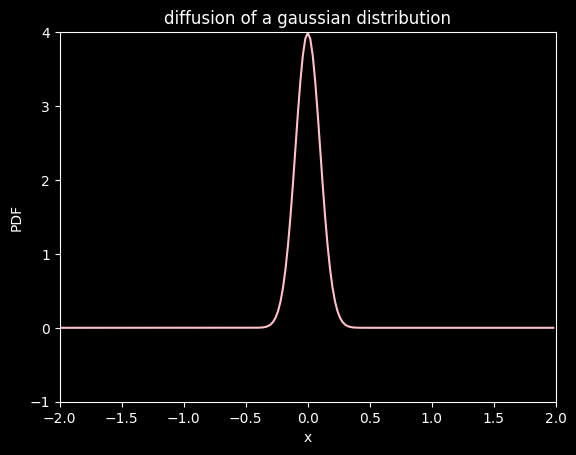

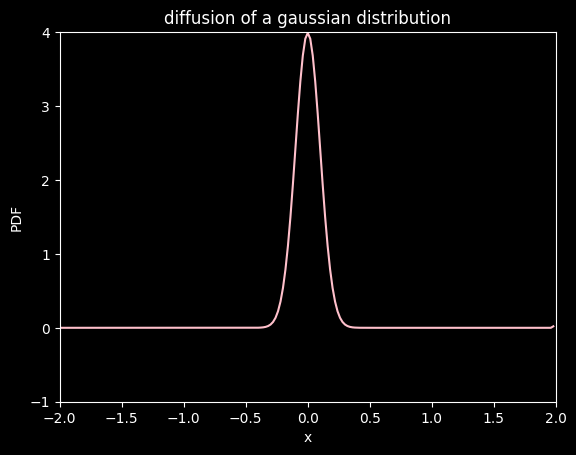

In [24]:
# Setting up the animation
FPS = 60
FRN = 250
FILE_1 = './example-img/convection_diffusion_in_1_dimension_dirichlet.gif'
FILE_2 = './example-img/convection_diffusion_in_1_dimension_neumann.gif'

# Calling the animation_() function defined in the previous cell.
# See the animation at ./example-img/convection_in_1_dimension.gif
animation_(dirichlet, x, FPS, FRN, FILE_1)

animation_(neumann, x, FPS, FRN, FILE_2)

In [ ]:
# Histogram of X_t 
